In [1]:

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#import from sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#from sklearn import svr #changed to SVR from SVM


In [3]:
#load dataset
amzn = pd.read_csv("______")#Enter data location 
print(amzn)


            Date         Open         High          Low        Close  \
0     2016-11-21   766.000000   780.349976   765.109985   780.000000   
1     2016-11-22   788.169983   792.400024   781.000000   785.330017   
2     2016-11-23   781.729980   781.750000   773.119995   780.119995   
3     2016-11-25   786.500000   786.750000   777.900024   780.369995   
4     2016-11-28   776.989990   777.000000   764.239990   766.770020   
...          ...          ...          ...          ...          ...   
1253  2021-11-12  3485.000000  3540.729980  3447.050049  3525.149902   
1254  2021-11-15  3537.000000  3593.879883  3525.810059  3545.679932   
1255  2021-11-16  3539.000000  3576.500000  3525.149902  3540.699951   
1256  2021-11-17  3564.719971  3587.250000  3545.350098  3549.000000   
1257  2021-11-18  3566.350098  3704.199951  3561.000000  3696.060059   

        Adj Close   Volume  
0      780.000000  4614600  
1      785.330017  5311300  
2      780.119995  3540300  
3      780.369995  

In [4]:
#Shape of the dataframe
print("The shape of the dataframe is: " , amzn.shape)

print("Are there any null values?" , amzn.isnull().values.any())



The shape of the dataframe is:  (1258, 7)
Are there any null values? False


<AxesSubplot:>

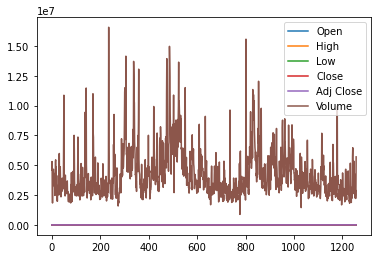

In [5]:
#exploring the data

amzn.plot()

<AxesSubplot:>

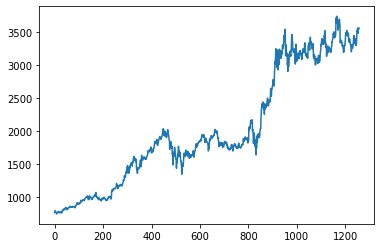

In [6]:
amzn['Open'].plot()

<AxesSubplot:>

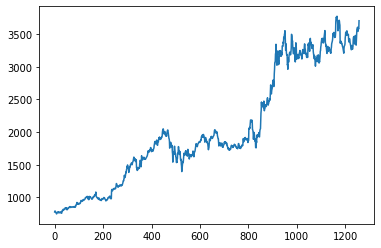

In [7]:
amzn['High'].plot()

<AxesSubplot:>

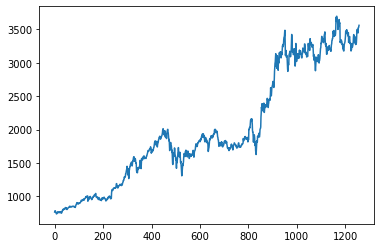

In [8]:
amzn['Low'].plot()

<AxesSubplot:>

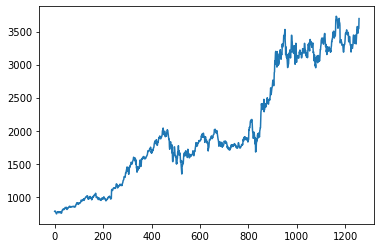

In [9]:
amzn['Close'].plot()


<AxesSubplot:>

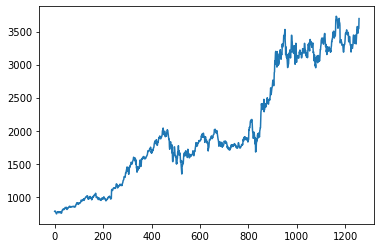

In [10]:
amzn['Adj Close'].plot()
"""adjusted close is probably the best indicator of the behavior of a
    stock it is an adjusted value of the closing value for the day.
    Adjustments could be due to things like dividends, stock splits, and
    other factors. This is a more accurate valuation of a stock's performance.
    This will be our target. The other categories can be used for learning."""

<AxesSubplot:>

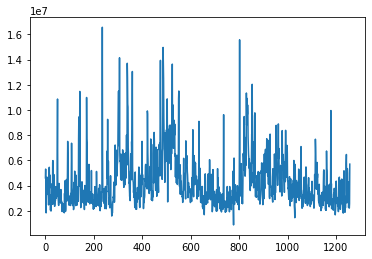

In [11]:
amzn['Volume'].plot()

In [12]:

#listing datatypes
print(amzn.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [13]:
#Put data into a dataframe
df = pd.DataFrame(amzn)



In [14]:
#split data for training vs testing
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=0.7)
#random state number was picked from a random number generator





In [15]:
X_train.shape

(377, 4)

In [16]:
X_test.shape

(881, 4)

In [17]:
#creating the model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=None, bootstrap=False)

In [18]:
#train the model

rfr.fit(X=X_train, y=y_train)

RandomForestRegressor(bootstrap=False, n_estimators=50, n_jobs=-1)

In [19]:
#prediction
predicted = rfr.predict(X=X_test)
expected = y_test



In [20]:
print(predicted[:20])

[3545.56497058 3205.41639624 1879.87197256 1907.569946   1791.25441856
 3269.91473156 3550.60318348 2977.570068   1765.4611912  1691.089966
 1821.7375976   955.61197272  996.700012   1775.069946   3201.9650388
 1877.28397456 3185.27002    3203.47960964 1591.62660884 2422.35941892]


In [21]:
print(expected[:20])

1170    3549.590088
913     3200.000000
603     1864.819946
653     1893.630005
411     1796.619995
1231    3284.280029
1254    3545.679932
1078    2951.949951
697     1776.290039
517     1663.540039
798     1828.339966
181      967.989990
148      993.979980
775     1786.500000
990     3162.780029
429     1862.479980
1015    3186.729980
1016    3162.580078
326     1598.390015
872     2356.949951
Name: Adj Close, dtype: float64


In [22]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [23]:
print(wrong)

[(3545.5649705799997, 3549.590088), (3205.4163962400007, 3200.0), (1879.8719725599994, 1864.819946), (1907.5699460000021, 1893.630005), (1791.254418560001, 1796.619995), (3269.914731560001, 3284.280029), (3550.6031834799996, 3545.679932), (2977.5700680000004, 2951.949951), (1765.4611912000014, 1776.290039), (1691.0899659999998, 1663.540039), (1821.7375976000005, 1828.339966), (955.6119727200004, 967.98999), (996.7000120000007, 993.97998), (1775.069946000002, 1786.5), (3201.965038799998, 3162.780029), (1877.2839745599993, 1862.47998), (3185.2700199999977, 3186.72998), (3203.4796096399973, 3162.580078), (1591.62660884, 1598.390015), (2422.35941892, 2356.949951), (1785.2267870400005, 1769.209961), (1807.5799560000012, 1813.030029), (2026.368407960001, 2004.199951), (3231.1991991200007, 3201.219971), (817.8890198999995, 809.039978), (1082.4253907199995, 1046.0), (1539.5345968600013, 1551.859985), (763.6064073599997, 749.869995), (1886.3000489999988, 1891.300049), (1631.7702002000003, 1636.

In [25]:
#tune the model
#Using r^2 as a metric to determine model accuracy

from sklearn.metrics import r2_score 
r2d2 = r2_score(y_true=expected, y_pred=predicted)
print("R^2 correlation coefficient is: %.4f" %r2d2)



R^2 correlation coefficient is: 0.9991


In [27]:
#This is supposed to be a good metric, though I am not up to speed as to it's exact usage

from sklearn.metrics import mean_squared_error
meanSq = mean_squared_error(y_true=expected, y_pred=predicted)
print(meanSq)

651.8076401980484


In [28]:
from sklearn.metrics import mean_absolute_error
meanAbs = mean_absolute_error(y_true=expected, y_pred=predicted)
print(meanAbs)

17.563574369421094


In [29]:
#lets compare against one more model
from sklearn import svm
svReg = svm.SVR()
svReg.fit(X=X_train,y=y_train)


SVR()

In [30]:
svPredict = svReg.predict(X_test)
svExpect = y_test


In [31]:
svPredict[:20]

array([1822.38526106, 1823.01470108, 1820.64889385, 1820.9686807 ,
       1823.18329656, 1819.54218163, 1820.73045905, 1822.90513905,
       1821.01504674, 1821.16989788, 1821.955802  , 1821.84475893,
       1821.68945736, 1823.23337356, 1822.91415025, 1821.67266444,
       1820.64560345, 1820.69428829, 1823.22368301, 1821.05018279])

In [32]:
svExpect[:20]

1170    3549.590088
913     3200.000000
603     1864.819946
653     1893.630005
411     1796.619995
1231    3284.280029
1254    3545.679932
1078    2951.949951
697     1776.290039
517     1663.540039
798     1828.339966
181      967.989990
148      993.979980
775     1786.500000
990     3162.780029
429     1862.479980
1015    3186.729980
1016    3162.580078
326     1598.390015
872     2356.949951
Name: Adj Close, dtype: float64

In [33]:
wrong2 = [(p, e) for (p, e) in zip(svPredict, svExpect) if p != e]

In [34]:
wrong2[:20]

[(1822.3852610628633, 3549.590088),
 (1823.0147010805176, 3200.0),
 (1820.6488938462232, 1864.819946),
 (1820.9686806976733, 1893.630005),
 (1823.183296557734, 1796.619995),
 (1819.542181628856, 3284.280029),
 (1820.730459048477, 3545.679932),
 (1822.9051390479249, 2951.949951),
 (1821.015046735415, 1776.290039),
 (1821.1698978790669, 1663.540039),
 (1821.955801996752, 1828.339966),
 (1821.8447589310213, 967.98999),
 (1821.6894573559978, 993.97998),
 (1823.2333735648958, 1786.5),
 (1822.9141502465354, 3162.780029),
 (1821.672664438758, 1862.47998),
 (1820.645603450477, 3186.72998),
 (1820.6942882873007, 3162.580078),
 (1823.2236830106701, 1598.390015),
 (1821.0501827886426, 2356.949951)]

In [35]:
print("Model accuracy: %.2f%%" %(svReg.score(X_test,y_test)*100))

Model accuracy: -4.78%


In [36]:
r2d3 = r2_score(y_true=svExpect, y_pred=svPredict)
print("R^2 correlation coefficient for Support Vector Regression is: %.4f" %r2d3)
print("R^2 correlation coefficient for Random Forest is: %.4f" %r2d2)
print("Random forest is the much better model.")

R^2 correlation coefficient for Support Vector Regression is: -0.0478
R^2 correlation coefficient for Random Forest is: 0.9991
Random forest is the much better model.


In [37]:
#kfold testing for hyperparameter tuning

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=kfold)

In [38]:
scores

array([0.99903912, 0.99900239, 0.99908728, 0.99758975, 0.99899128,
       0.9991255 , 0.99858825, 0.99890615, 0.99880451, 0.99840639])

In [39]:
print(f'Mean accuracy: {scores.mean():.2%}')
print("Model(Random forest) accuracy: %.2f%%" %(rfr.score(X_test,y_test)*100))


Mean accuracy: 99.88%
Model(Random forest) accuracy: 99.91%


In [40]:
#tuning the data n-estimators

for r in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2= RandomForestRegressor(n_estimators=r)
    scores = cross_val_score(estimator=rfr2,X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')

r=1 ; mean accuracy=99.84%std dev = 0.07%
r=3 ; mean accuracy=99.88%std dev = 0.04%
r=5 ; mean accuracy=99.89%std dev = 0.03%
r=7 ; mean accuracy=99.89%std dev = 0.04%
r=9 ; mean accuracy=99.89%std dev = 0.05%
r=11; mean accuracy=99.91%std dev = 0.03%
r=13; mean accuracy=99.91%std dev = 0.03%
r=15; mean accuracy=99.91%std dev = 0.03%
r=17; mean accuracy=99.91%std dev = 0.03%
r=19; mean accuracy=99.91%std dev = 0.03%


In [41]:
#checking higher numbers to see if it makes a difference

for r in range(100, 110, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2= RandomForestRegressor(n_estimators=r)
    scores = cross_val_score(estimator=rfr2,X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')

r=100; mean accuracy=99.91%std dev = 0.02%
r=102; mean accuracy=99.91%std dev = 0.03%
r=104; mean accuracy=99.91%std dev = 0.03%
r=106; mean accuracy=99.91%std dev = 0.03%
r=108; mean accuracy=99.91%std dev = 0.03%


In [42]:
#Lets try another parameter in RFR: n-jobs
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr2 = RandomForestRegressor(n_jobs=-1)
scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
print(f'r=-1; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    
for r in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(n_jobs=r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')

r=-1; mean accuracy=99.91%std dev = 0.03%
r=1 ; mean accuracy=99.91%std dev = 0.02%
r=3 ; mean accuracy=99.91%std dev = 0.02%
r=5 ; mean accuracy=99.91%std dev = 0.03%
r=7 ; mean accuracy=99.91%std dev = 0.03%
r=9 ; mean accuracy=99.91%std dev = 0.03%
r=11; mean accuracy=99.91%std dev = 0.03%
r=13; mean accuracy=99.91%std dev = 0.03%
r=15; mean accuracy=99.91%std dev = 0.03%
r=17; mean accuracy=99.91%std dev = 0.03%
r=19; mean accuracy=99.91%std dev = 0.03%


In [43]:
#lets test bootstrapping.

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr2 = RandomForestRegressor(bootstrap=False)
scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
print(f'False; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
print("Bootstrap True accuracy: %.2f%%" %(rfr.score(X_test,y_test)*100))

False; mean accuracy=99.87%std dev = 0.04%
Bootstrap True accuracy: 99.91%


In [44]:
#test the minimum amount of samples required for a leaf node
for r in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(min_samples_leaf=r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')

r=1 ; mean accuracy=99.91%std dev = 0.03%
r=3 ; mean accuracy=99.90%std dev = 0.03%
r=5 ; mean accuracy=99.86%std dev = 0.04%
r=7 ; mean accuracy=99.75%std dev = 0.07%
r=9 ; mean accuracy=99.67%std dev = 0.09%
r=11; mean accuracy=99.58%std dev = 0.14%
r=13; mean accuracy=99.45%std dev = 0.23%
r=15; mean accuracy=99.23%std dev = 0.31%
r=17; mean accuracy=98.94%std dev = 0.44%
r=19; mean accuracy=98.65%std dev = 0.53%


In [45]:
#test the minimum amount of samples required for a leaf node
for r in range(2, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(min_samples_split=r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')

r=2 ; mean accuracy=99.91%std dev = 0.03%
r=4 ; mean accuracy=99.91%std dev = 0.02%
r=6 ; mean accuracy=99.90%std dev = 0.03%
r=8 ; mean accuracy=99.89%std dev = 0.03%
r=10; mean accuracy=99.87%std dev = 0.04%
r=12; mean accuracy=99.83%std dev = 0.05%
r=14; mean accuracy=99.77%std dev = 0.06%
r=16; mean accuracy=99.73%std dev = 0.07%
r=18; mean accuracy=99.70%std dev = 0.08%


In [46]:
#test the max amount of leaf nodes
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr2 = RandomForestRegressor(max_leaf_nodes=None)
scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
print(f'r=none; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    
for r in range(2,20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(max_leaf_nodes=r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    

r=none; mean accuracy=99.91%std dev = 0.03%
r=2 ; mean accuracy=81.18%std dev = 5.59%
r=4 ; mean accuracy=96.70%std dev = 0.66%
r=6 ; mean accuracy=98.58%std dev = 0.51%
r=8 ; mean accuracy=99.22%std dev = 0.23%
r=10; mean accuracy=99.49%std dev = 0.17%
r=12; mean accuracy=99.68%std dev = 0.12%
r=14; mean accuracy=99.78%std dev = 0.08%
r=16; mean accuracy=99.82%std dev = 0.07%
r=18; mean accuracy=99.84%std dev = 0.05%


In [47]:
#max depth 

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr2 = RandomForestRegressor(max_depth=None)
scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
print(f'r=None; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    
for r in range(1,30, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(max_depth=r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    

r=None; mean accuracy=99.91%std dev = 0.02%
r=1 ; mean accuracy=81.27%std dev = 5.50%
r=3 ; mean accuracy=99.06%std dev = 0.29%
r=5 ; mean accuracy=99.89%std dev = 0.03%
r=7 ; mean accuracy=99.91%std dev = 0.03%
r=9 ; mean accuracy=99.91%std dev = 0.03%
r=11; mean accuracy=99.91%std dev = 0.03%
r=13; mean accuracy=99.91%std dev = 0.03%
r=15; mean accuracy=99.91%std dev = 0.03%
r=17; mean accuracy=99.91%std dev = 0.03%
r=19; mean accuracy=99.91%std dev = 0.03%
r=21; mean accuracy=99.91%std dev = 0.03%
r=23; mean accuracy=99.91%std dev = 0.03%
r=25; mean accuracy=99.91%std dev = 0.03%
r=27; mean accuracy=99.91%std dev = 0.03%
r=29; mean accuracy=99.91%std dev = 0.03%


In [48]:
for r in range(1,20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    rfr2 = RandomForestRegressor(random_state = r)
    scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
    print(f'r={r:<2}; mean accuracy={scores.mean():.2%}' + f'std dev = {scores.std():.2%}')
    

r=1 ; mean accuracy=99.91%std dev = 0.03%
r=3 ; mean accuracy=99.91%std dev = 0.03%
r=5 ; mean accuracy=99.91%std dev = 0.03%
r=7 ; mean accuracy=99.91%std dev = 0.03%
r=9 ; mean accuracy=99.91%std dev = 0.03%
r=11; mean accuracy=99.91%std dev = 0.03%
r=13; mean accuracy=99.91%std dev = 0.03%
r=15; mean accuracy=99.91%std dev = 0.03%
r=17; mean accuracy=99.91%std dev = 0.03%
r=19; mean accuracy=99.91%std dev = 0.03%


In [94]:
#I can speed up some aspects of the model at least I think
start1 = time.time()
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr= RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=None, bootstrap=False)
scores = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=kfold)
end1 = time.time()
print(f'default model; mean accuracy={scores.mean():.2%} ' + f'std dev = {scores.std():.2%}')
print("The time it took to run is: ", end1-start1)

start2 = time.time()
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
rfr2 = RandomForestRegressor(n_jobs=1, n_estimators=17, max_depth=9, bootstrap=True) #this is the optimized model
scores = cross_val_score(estimator=rfr2, X=X_train, y=y_train, cv=kfold)
end2 = time.time()
print(f'Optimized model; mean accuracy={scores.mean():.2%} ' + f'std dev = {scores.std():.2%}')
print("The time it took to run is: ", end2-start2)    



default model; mean accuracy=92.90% std dev = 6.77%
The time it took to run is:  7.040160894393921
Optimized model; mean accuracy=94.97% std dev = 4.28%
The time it took to run is:  0.2862663269042969


In [50]:
#make predictions on live data

amznRecent = pd.read_csv("______")#use file for 6 weeks of recent data



In [51]:
amznDf = pd.DataFrame(amznRecent)

X2 = amznDf[['Open', 'High', 'Low', 'Volume']]
y2 = amznDf['Adj Close']


rfr = RandomForestRegressor(n_jobs=1, n_estimators=17, max_depth=9, bootstrap=True)
rfr.fit(X=X_train, y=y_train)
amznNew = rfr.predict(X=X2)



In [95]:
wrong = [(p, e) for (p, e) in zip(amznNew, y2) if p != e]

In [96]:
wrong

[(3696.0788576470595, 3572.570068),
 (3601.617000941177, 3580.040039),
 (3584.3946463529414, 3580.409912),
 (3585.1681986470594, 3504.560059),
 (3588.8546503529415, 3561.570068),
 (3544.72761082353, 3507.070068),
 (3525.2376205882356, 3443.719971),
 (3477.118838941176, 3437.360107),
 (3403.9359058235295, 3389.790039),
 (3415.53181, 3427.370117)]

In [97]:
r2d2 = r2_score(y_true=amznNew, y_pred=y2)
print("R^2 correlation coefficient is: %.4f" %r2d2)

R^2 correlation coefficient is: 0.5466


<AxesSubplot:>

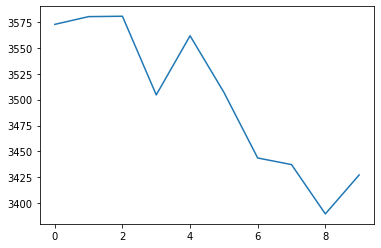

In [98]:
#One last thing to do is try is trim the dataset.

amznTrimmed = pd.read_csv("__________")#dataset was trimmed to reflect the last year instead of the entire timeline

df = pd.DataFrame(amznTrimmed)
#split data for training vs testing
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=0.7)
#random state number was picked from a random number generator

rfr = RandomForestRegressor(n_jobs=1, n_estimators=17, max_depth=9, bootstrap=True)
rfr.fit(X=X_train, y=y_train)

amznDf = pd.DataFrame(amznRecent)

X2 = amznDf[['Open', 'High', 'Low', 'Volume']]
y2 = amznDf['Adj Close']

amznNew = rfr.predict(X=X2)
#prediction
predicted = rfr.predict(X=X_test)
expected = y_test
#predicted[:20]
#expected[:20]
y2.plot()

In [99]:
wrong = [(p, e) for (p, e) in zip(amznNew, y2) if p != e]

In [100]:
wrong

[(3692.5870865294123, 3572.570068),
 (3610.260541294118, 3580.040039),
 (3597.4981907058823, 3580.409912),
 (3610.2787800000006, 3504.560059),
 (3575.3123133529416, 3561.570068),
 (3549.5423224117644, 3507.070068),
 (3526.88407617647, 3443.719971),
 (3471.9729289999996, 3437.360107),
 (3423.1894387058824, 3389.790039),
 (3427.580623764706, 3427.370117)]

In [101]:
r2d2 = r2_score(y_true=amznNew, y_pred=y2)
print("R^2 correlation coefficient is: %.4f" %r2d2)
#Obviously this needs work. Greater tuning and maybe aggregating results from different models may provide a better result.
#Of course the stock market is terribly difficult to predict. It's hard to truely predict its ebs and flows. More research will be needed. 



R^2 correlation coefficient is: 0.4424
